<a href="https://colab.research.google.com/github/srijanparia/Handwritten-Digits-Classification-using-NN/blob/main/Handwritten_digits_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
x_train[0].shape

(28, 28)

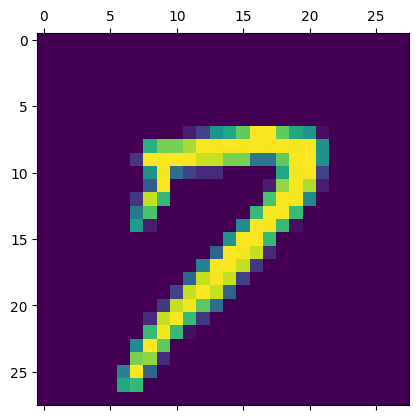

In [8]:
plt.matshow(x_train[599])

In [9]:
y_train[599]

7

In [10]:
len(y_train)

60000

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train /255
x_test = x_test / 255

In [13]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 15s 4ms/step - loss: 0.4698 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3041 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2839 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2736 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9252


In [17]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.9271


[0.26795366406440735, 0.9271000027656555]

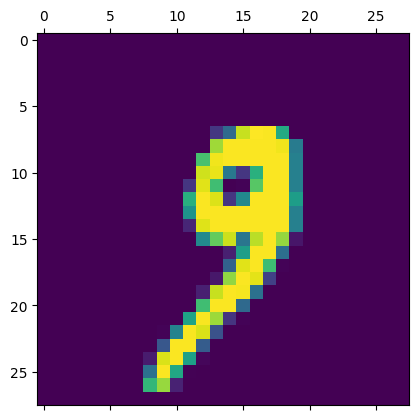

In [18]:
plt.matshow(x_test[1000])

In [19]:
y_predict = model.predict(x_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [20]:
y_predict[10]

array([9.9901235e-01, 1.2328867e-07, 3.5819334e-01, 8.4937610e-02,
       1.0886265e-04, 7.0863074e-01, 4.8132803e-02, 1.5925954e-05,
       5.9130013e-01, 2.8411919e-04], dtype=float32)

In [21]:
np.argmax(y_predict[1000])

9

In [22]:
y_predicted_labels = [ np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    4,    9,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  920,   17,   12,    1,   14,   10,   40,    2],
       [   3,    0,   15,  925,    0,   21,    3,   12,   26,    5],
       [   1,    1,    2,    1,  919,    0,   12,    4,   11,   31],
       [  11,    3,    3,   31,   12,  762,   20,    8,   36,    6],
       [   9,    3,    2,    2,    7,    8,  923,    2,    2,    0],
       [   1,    5,   24,    7,   10,    0,    0,  955,    3,   23],
       [   7,    7,    6,   17,    8,   18,   12,   12,  882,    5],
       [  11,    7,    1,   11,   24,    5,    0,   27,   10,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

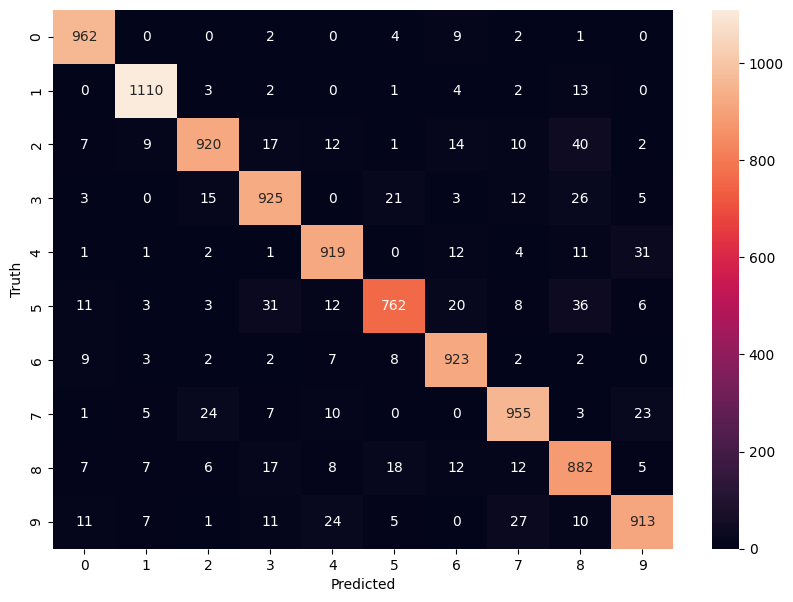

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #Hidden Layer_1
    keras.layers.Dense(50, activation='relu'), #Hidden Layer_2
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2542 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1106 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0779 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0607 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0484 - accuracy: 0.9845


In [26]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9761


[0.08030849695205688, 0.9761000275611877]

In [27]:
y_predict = model.predict(x_test_flattened)
y_predicted_labels = [ np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

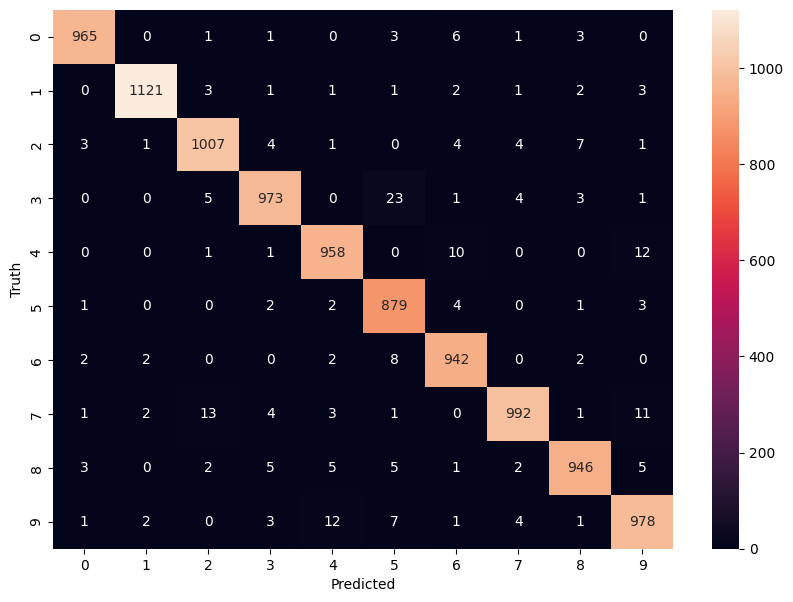

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

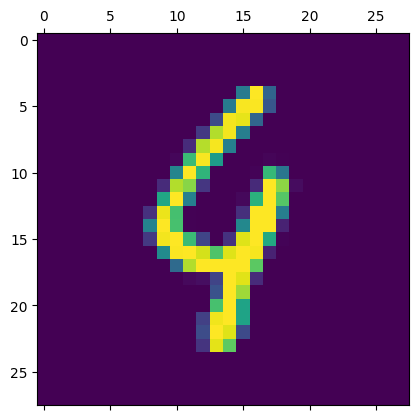

In [44]:
plt.matshow(x_test[115])

In [45]:
np.argmax(y_predict[115])

9

In [46]:
y_test[115]

4

In [47]:
count = 0
for i in range(10000):
  if y_test[i] != y_predicted_labels[i]:
    count += 1
    #print(i)

print(count)

239
